In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

In [2]:
df=pd.read_csv("weatherAUS.csv")

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
df.dropna(subset=['RainToday','RainTomorrow'],inplace=True)

In [6]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustDir       9163
WindGustSpeed     9105
WindDir9am        9660
WindDir3pm        3670
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
RainToday            0
RainTomorrow         0
dtype: int64

In [7]:
df.columns=df.columns.str.lower()

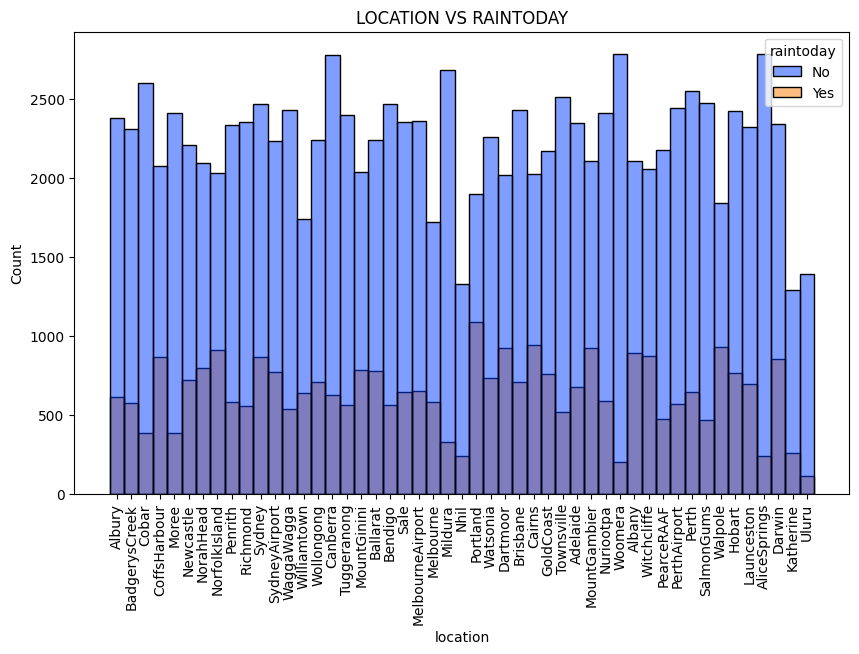

In [8]:
matplotlib.rcParams['font.size']=10
matplotlib.rcParams['figure.figsize']=(10,6)
plt.xticks(rotation=90)  
plt.title('LOCATION VS RAINTODAY')
sns.histplot(x='location',data=df,hue='raintoday',palette='bright',alpha=0.5);

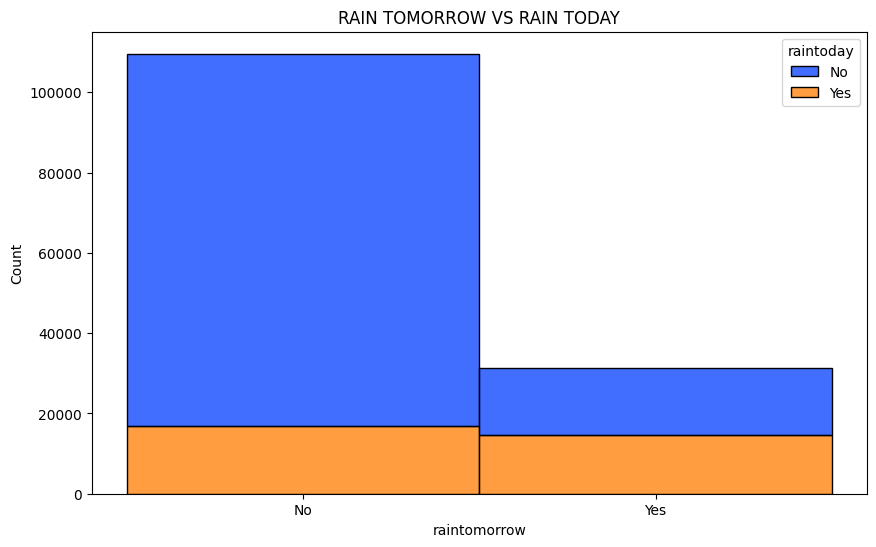

In [9]:
sns.histplot(x='raintomorrow',data=df,hue='raintoday',palette='bright',multiple='stack');
plt.title('RAIN TOMORROW VS RAIN TODAY');

In [10]:
df['date']=pd.to_datetime(df['date'])

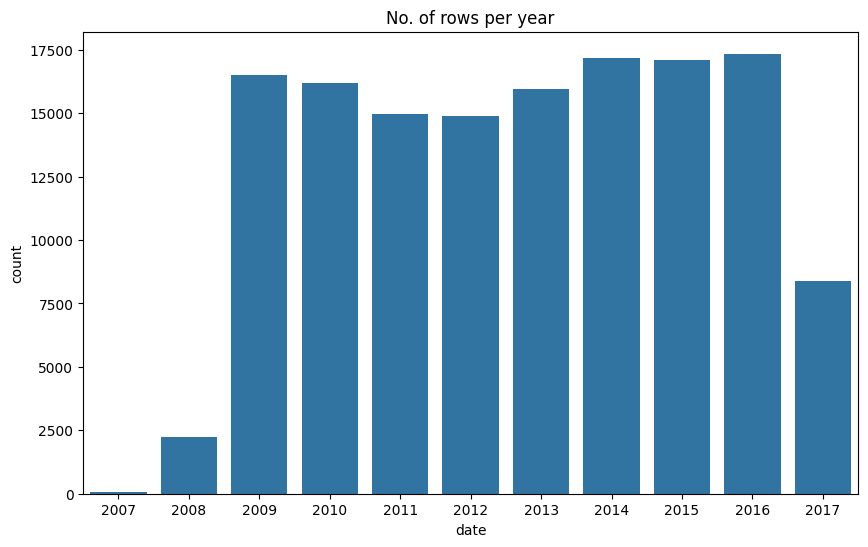

In [11]:
plt.title('No. of rows per year')
sns.countplot(x=df['date'].dt.year);

In [12]:
year=df.date.dt.year

In [13]:
train_df=df[year<2015]
val_df=df[year==2015]
test_df=df[year>2015]

In [14]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (97988, 23)
val_df.shape : (17089, 23)
test_df.shape : (25710, 23)


In [15]:
train_df.columns

Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windspeed9am', 'windspeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday', 'raintomorrow'],
      dtype='object')

In [52]:
input_cols=list(train_df.columns)[1:-1]
target_cols=['raintomorrow']

In [17]:
input_cols

['location',
 'mintemp',
 'maxtemp',
 'rainfall',
 'evaporation',
 'sunshine',
 'windgustdir',
 'windgustspeed',
 'winddir9am',
 'winddir3pm',
 'windspeed9am',
 'windspeed3pm',
 'humidity9am',
 'humidity3pm',
 'pressure9am',
 'pressure3pm',
 'cloud9am',
 'cloud3pm',
 'temp9am',
 'temp3pm',
 'raintoday']

In [18]:
traininputs=train_df[input_cols].copy()
traintarget=train_df[target_cols].copy()

In [19]:
valinputs=val_df[input_cols].copy()
valtarget=val_df[target_cols].copy()

In [20]:
testinputs=test_df[input_cols].copy()
testtarget=test_df[target_cols].copy()

In [21]:
traininputs.columns

Index(['location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine',
       'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windspeed9am', 'windspeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday'],
      dtype='object')

In [22]:
traintarget

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: raintomorrow, Length: 97988, dtype: object

In [23]:
numericcols=traininputs.select_dtypes(include=np.number).columns.tolist()
categoricalcols=traininputs.select_dtypes('object').columns.tolist()

In [24]:
traininputs[numericcols].describe()

,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustspeed,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm
count,97674.000000,97801.000000,97988.000000,61657.000000,57942.000000,91160.000000,97114.000000,96919.000000,96936.000000,96872.000000,88876.000000,88857.000000,63000.000000,61966.000000,97414.000000,97392.000000
mean,12.007831,23.022202,2.372935,5.289991,7.609004,40.215873,14.092263,18.764608,68.628745,51.469547,1017.513734,1015.132352,4.302952,4.410677,16.835126,21.540138
std,6.347175,6.984397,8.518819,3.952010,3.788813,13.697967,8.984203,8.872398,19.003097,20.756113,7.072510,6.997072,2.866634,2.693370,6.404586,6.831612
min,-8.500000,-4.100000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,979.000000,0.000000,0.000000,-5.900000,-5.100000
25%,7.500000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.800000,1010.400000,1.000000,2.000000,12.200000,16.600000
50%,11.800000,22.400000,0.000000,4.600000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.500000,1015.100000,5.000000,5.000000,16.600000,20.900000
75%,16.600000,27.900000,0.800000,7.200000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.300000,1019.900000,7.000000,7.000000,21.400000,26.200000
max,33.900000,48.100000,371.000000,82.400000,14.300000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.100000


In [25]:
traininputs[categoricalcols].nunique()

location       49
windgustdir    16
winddir9am     16
winddir3pm     16
raintoday       2
dtype: int64

In [26]:
df[numericcols].isna().sum()

mintemp            468
maxtemp            307
rainfall             0
evaporation      59694
sunshine         66805
windgustspeed     9105
windspeed9am      1055
windspeed3pm      2531
humidity9am       1517
humidity3pm       3501
pressure9am      13743
pressure3pm      13769
cloud9am         52625
cloud3pm         56094
temp9am            656
temp3pm           2624
dtype: int64

In [27]:
traininputs[numericcols].isna().sum()

mintemp            314
maxtemp            187
rainfall             0
evaporation      36331
sunshine         40046
windgustspeed     6828
windspeed9am       874
windspeed3pm      1069
humidity9am       1052
humidity3pm       1116
pressure9am       9112
pressure3pm       9131
cloud9am         34988
cloud3pm         36022
temp9am            574
temp3pm            596
dtype: int64

In [28]:
imputer=SimpleImputer(strategy='mean')

In [29]:
imputer.fit(df[numericcols])

,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [30]:
traininputs[numericcols]=imputer.transform(traininputs[numericcols])
valinputs[numericcols]=imputer.transform(valinputs[numericcols])
testinputs[numericcols]=imputer.transform(testinputs[numericcols])

In [31]:
traininputs[numericcols].isna().sum()

mintemp          0
maxtemp          0
rainfall         0
evaporation      0
sunshine         0
windgustspeed    0
windspeed9am     0
windspeed3pm     0
humidity9am      0
humidity3pm      0
pressure9am      0
pressure3pm      0
cloud9am         0
cloud3pm         0
temp9am          0
temp3pm          0
dtype: int64

In [32]:
traininputs[numericcols].describe()

,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustspeed,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm
count,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000
mean,12.008398,23.022609,2.372935,5.357666,7.617805,40.198776,14.091355,18.763152,68.630871,51.469317,1017.526831,1015.144057,4.348731,4.443238,16.836016,21.541069
std,6.337005,6.977735,8.518819,3.136123,2.913498,13.212242,8.944051,8.823879,18.900823,20.637576,6.735769,6.663187,2.299375,2.142256,6.385810,6.810814
min,-8.500000,-4.100000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,979.000000,0.000000,0.000000,-5.900000,-5.100000
25%,7.500000,17.900000,0.000000,3.800000,7.500000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.400000,1010.900000,3.000000,3.000000,12.200000,16.600000
50%,11.800000,22.400000,0.000000,5.472516,7.630540,39.000000,13.000000,19.000000,69.000000,52.000000,1017.654577,1015.257963,4.431161,4.499250,16.600000,21.000000
75%,16.600000,27.900000,0.800000,5.600000,9.200000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.300000,6.000000,6.000000,21.300000,26.100000
max,33.900000,48.100000,371.000000,82.400000,14.300000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.100000


In [33]:
scaler=MinMaxScaler()

In [34]:
scaler.fit(df[numericcols])

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [35]:
traininputs[numericcols]=scaler.transform(traininputs[numericcols])
valinputs[numericcols]=scaler.transform(valinputs[numericcols])
testinputs[numericcols]=scaler.transform(testinputs[numericcols])

In [36]:
traininputs.describe()

,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustspeed,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm
count,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000
mean,0.483689,0.525947,0.006396,0.036949,0.525366,0.265107,0.108395,0.215668,0.686309,0.514693,0.612014,0.608705,0.483192,0.493693,0.507089,0.517103
std,0.149458,0.131904,0.022962,0.021628,0.200931,0.102420,0.068800,0.101424,0.189008,0.206376,0.111335,0.106611,0.255486,0.238028,0.134722,0.130726
min,0.000000,0.013233,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030400,0.000000,0.000000,0.027426,0.005758
25%,0.377358,0.429112,0.000000,0.026207,0.517241,0.193798,0.053846,0.149425,0.570000,0.370000,0.543802,0.540800,0.333333,0.333333,0.409283,0.422265
50%,0.478774,0.514178,0.000000,0.037741,0.526244,0.255814,0.100000,0.218391,0.690000,0.520000,0.614125,0.610527,0.492351,0.499917,0.502110,0.506718
75%,0.591981,0.618147,0.002156,0.038621,0.634483,0.310078,0.146154,0.275862,0.830000,0.650000,0.682645,0.675200,0.666667,0.666667,0.601266,0.604607
max,1.000000,1.000000,1.000000,0.568276,0.986207,1.000000,0.669231,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988484


In [37]:
encoder=OneHotEncoder(sparse_output=False,handle_unknown='ignore')

In [38]:
encoder.fit(df[categoricalcols])

,categories,'auto'
,drop,None
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'ignore'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [39]:
encodedcols=list(encoder.get_feature_names_out(categoricalcols))

In [40]:
encodedcols

['location_Adelaide',
 'location_Albany',
 'location_Albury',
 'location_AliceSprings',
 'location_BadgerysCreek',
 'location_Ballarat',
 'location_Bendigo',
 'location_Brisbane',
 'location_Cairns',
 'location_Canberra',
 'location_Cobar',
 'location_CoffsHarbour',
 'location_Dartmoor',
 'location_Darwin',
 'location_GoldCoast',
 'location_Hobart',
 'location_Katherine',
 'location_Launceston',
 'location_Melbourne',
 'location_MelbourneAirport',
 'location_Mildura',
 'location_Moree',
 'location_MountGambier',
 'location_MountGinini',
 'location_Newcastle',
 'location_Nhil',
 'location_NorahHead',
 'location_NorfolkIsland',
 'location_Nuriootpa',
 'location_PearceRAAF',
 'location_Penrith',
 'location_Perth',
 'location_PerthAirport',
 'location_Portland',
 'location_Richmond',
 'location_Sale',
 'location_SalmonGums',
 'location_Sydney',
 'location_SydneyAirport',
 'location_Townsville',
 'location_Tuggeranong',
 'location_Uluru',
 'location_WaggaWagga',
 'location_Walpole',
 'locat

In [41]:
import warnings
warnings.filterwarnings("ignore", message=".*DataFrame is highly fragmented.*")


In [42]:
traininputs[encodedcols] = encoder.transform(traininputs[categoricalcols])
valinputs[encodedcols] = encoder.transform(valinputs[categoricalcols])
testinputs[encodedcols] = encoder.transform(testinputs[categoricalcols])

In [43]:
traininputs.head()

,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,...,winddir3pm_SE,winddir3pm_SSE,winddir3pm_SSW,winddir3pm_SW,winddir3pm_W,winddir3pm_WNW,winddir3pm_WSW,winddir3pm_nan,raintoday_No,raintoday_Yes
0,Albury,0.516509,0.523629,0.001617,0.037741,0.526244,W,0.294574,W,WNW,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,Albury,0.375000,0.565217,0.000000,0.037741,0.526244,WNW,0.294574,NNW,WSW,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,Albury,0.504717,0.576560,0.000000,0.037741,0.526244,WSW,0.310078,W,WSW,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,Albury,0.417453,0.620038,0.000000,0.037741,0.526244,NE,0.139535,SE,E,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Albury,0.613208,0.701323,0.002695,0.037741,0.526244,W,0.271318,ENE,NW,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [44]:
pd.set_option('display.max_columns', None)

In [45]:
traininputs[numericcols+encodedcols].head()

,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustspeed,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,location_Adelaide,location_Albany,location_Albury,location_AliceSprings,location_BadgerysCreek,location_Ballarat,location_Bendigo,location_Brisbane,location_Cairns,location_Canberra,location_Cobar,location_CoffsHarbour,location_Dartmoor,location_Darwin,location_GoldCoast,location_Hobart,location_Katherine,location_Launceston,location_Melbourne,location_MelbourneAirport,location_Mildura,location_Moree,location_MountGambier,location_MountGinini,location_Newcastle,location_Nhil,location_NorahHead,location_NorfolkIsland,location_Nuriootpa,location_PearceRAAF,location_Penrith,location_Perth,location_PerthAirport,location_Portland,location_Richmond,location_Sale,location_SalmonGums,location_Sydney,location_SydneyAirport,location_Townsville,location_Tuggeranong,location_Uluru,location_WaggaWagga,location_Walpole,location_Watsonia,location_Williamtown,location_Witchcliffe,location_Wollongong,location_Woomera,windgustdir_E,windgustdir_ENE,windgustdir_ESE,windgustdir_N,windgustdir_NE,windgustdir_NNE,windgustdir_NNW,windgustdir_NW,windgustdir_S,windgustdir_SE,windgustdir_SSE,windgustdir_SSW,windgustdir_SW,windgustdir_W,windgustdir_WNW,windgustdir_WSW,windgustdir_nan,winddir9am_E,winddir9am_ENE,winddir9am_ESE,winddir9am_N,winddir9am_NE,winddir9am_NNE,winddir9am_NNW,winddir9am_NW,winddir9am_S,winddir9am_SE,winddir9am_SSE,winddir9am_SSW,winddir9am_SW,winddir9am_W,winddir9am_WNW,winddir9am_WSW,winddir9am_nan,winddir3pm_E,winddir3pm_ENE,winddir3pm_ESE,winddir3pm_N,winddir3pm_NE,winddir3pm_NNE,winddir3pm_NNW,winddir3pm_NW,winddir3pm_S,winddir3pm_SE,winddir3pm_SSE,winddir3pm_SSW,winddir3pm_SW,winddir3pm_W,winddir3pm_WNW,winddir3pm_WSW,winddir3pm_nan,raintoday_No,raintoday_Yes
0,0.516509,0.523629,0.001617,0.037741,0.526244,0.294574,0.153846,0.275862,0.71,0.22,0.449587,0.4800,0.888889,0.499917,0.508439,0.522073,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.375000,0.565217,0.000000,0.037741,0.526244,0.294574,0.030769,0.252874,0.44,0.25,0.497521,0.4912,0.492351,0.499917,0.514768,0.570058,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.504717,0.576560,0.000000,0.037741,0.526244,0.310078,0.146154,0.298851,0.38,0.30,0.447934,0.5056,0.492351,0.222222,0.594937,0.548944,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.417453,0.620038,0.000000,0.037741,0.526244,0.139535,0.084615,0.103448,0.45,0.16,0.613223,0.5712,0.492351,0.499917,0.533755,0.612284,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [46]:
traininputs.shape

(97988, 123)

In [47]:
traintarget

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: raintomorrow, Length: 97988, dtype: object

In [48]:
traininputs['raintomorrow']=traintarget
valinputs['raintomorrow']=valtarget
testinputs['raintomorrow']=testtarget


In [54]:
traininputs[numericcols+encodedcols+target_cols].to_csv("train.csv", index=False)
valinputs[numericcols+encodedcols+target_cols].to_csv("val.csv", index=False)
testinputs[numericcols+encodedcols+target_cols].to_csv("test.csv", index=False)